# Auswertung 200218_23

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [19]:
measurement_id = "200218_23"
campaign_id    = "03_Verifikation_2"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [20]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [21]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

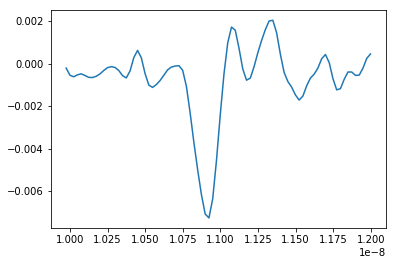

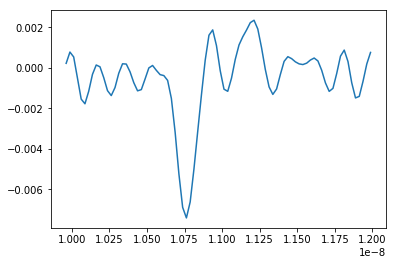

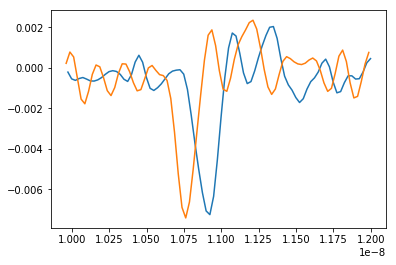

In [22]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

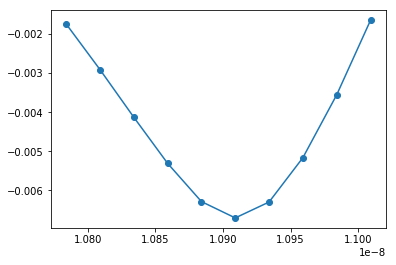

In [23]:
areaMinC1 = 32
areaMaxC1 = 42
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

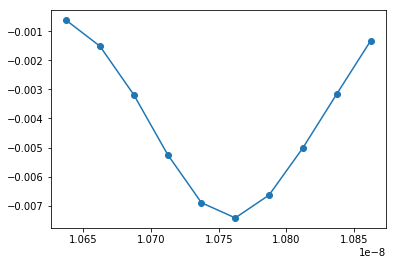

In [24]:
areaMinC3 = 27
areaMaxC3 = 37
pulsnr = 123

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [25]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.09e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [26]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [27]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

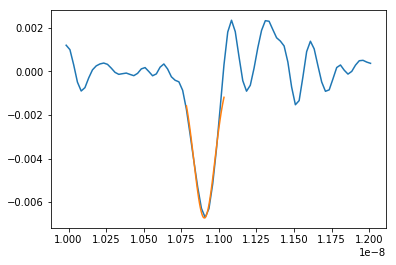

parameter: [-1.18222061e-12  1.09035027e-08  7.01159315e-11] [A, mu, sigma]


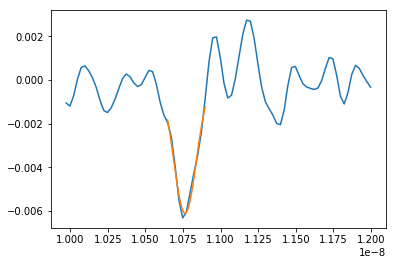

parameter: [-1.14376651e-12  1.07636397e-08  7.48075913e-11] [A, mu, sigma]


In [28]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

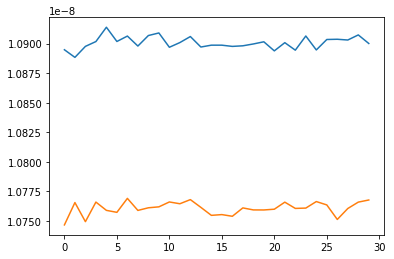

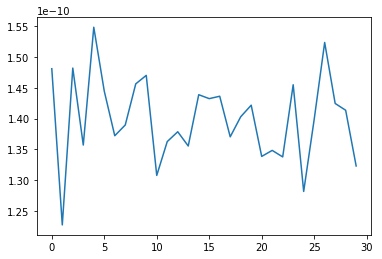

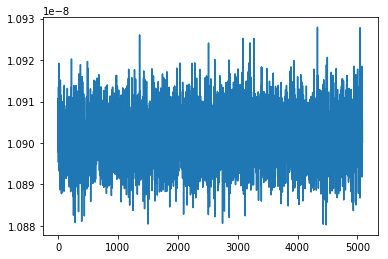

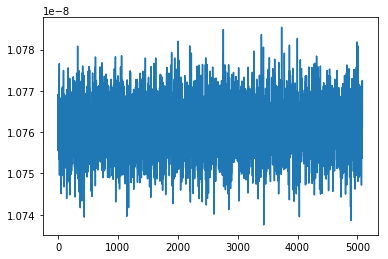

In [29]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [30]:
JitterGauss = jitter(C1, C3, axis = 1)

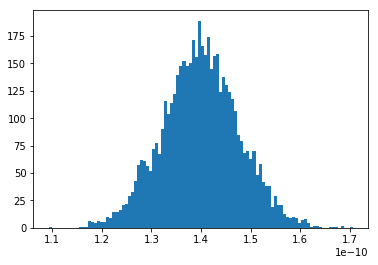

In [31]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

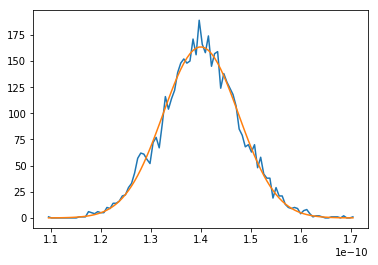

parameter: [3.09063696e-09 1.39953857e-10 7.53981536e-12] [A, mu, sigma]


In [32]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.5e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [33]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 7.539815364893292 ps
σ_1: 5.33145457341057 ps
σ_1 = σ_0 / sqrt(2)

μ: 139.95385689991343 ps

coma separated [σ_0, σ_1, μ]
7.539815364893292e-12,5.33145457341057e-12,1.3995385689991344e-10

 tab separated [σ_0, σ_1, μ]
7.539815364893292e-12	5.33145457341057e-12	1.3995385689991344e-10


## algorithm 2: min

In [34]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [35]:
factor = 0.5

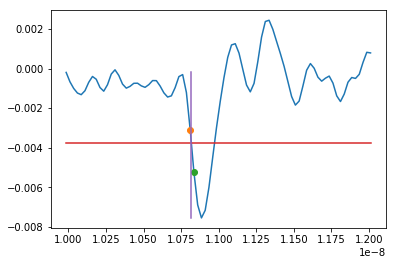

xt: 1.08177214363716e-08 ps, yt -0.003770692350713034 ps


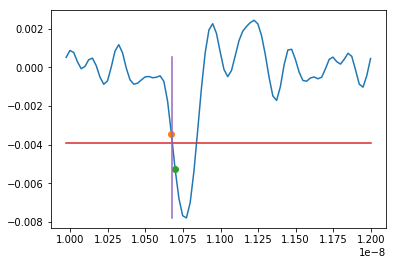

xt: 1.0679289862118365e-08 ps, yt -0.003893544854463471 ps


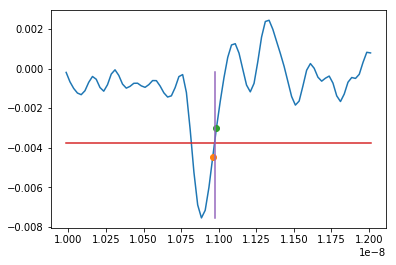

xt: 1.0971660425273082e-08 ps, yt -0.003770692350713034 ps


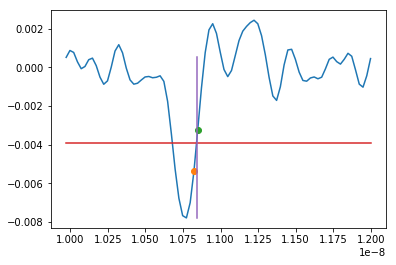

xt: 1.0840648692704214e-08 ps, yt -0.003893544854463471 ps


In [36]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [37]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [38]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

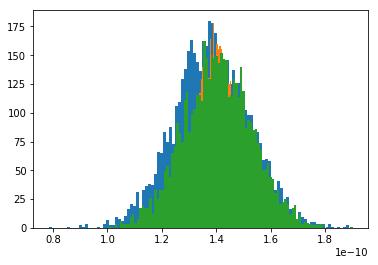

In [43]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins, range = (1.1e-10, JitterThres5c.max()))
HistThres5r = histogram(JitterThres5r, bins, range = (1e-10, JitterThres5r.max()))

### fit gauss to histogram

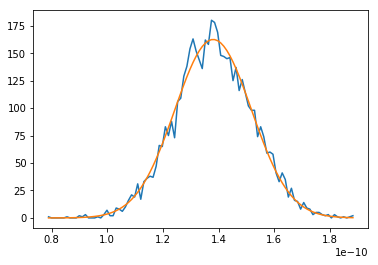

parameter: [5.60772152e-09 1.38071182e-10 1.37670176e-11] [A, mu, sigma]


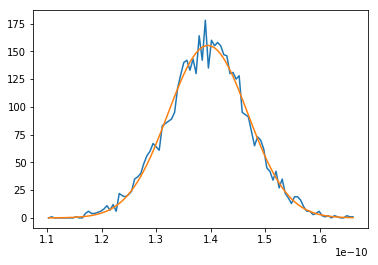

parameter: [2.84435874e-09 1.39516767e-10 7.30737472e-12] [A, mu, sigma]


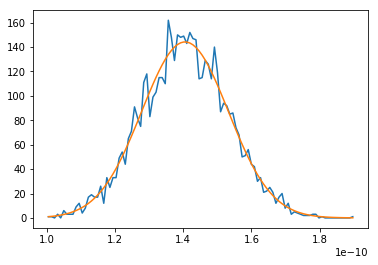

parameter: [4.58709274e-09 1.40522469e-10 1.26866786e-11] [A, mu, sigma]


In [44]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.47e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.5e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.53e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [45]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 13.767017558585932 ps
σ_1: 9.73475147239038 ps
σ_1 = σ_0 / sqrt(2)

μ: 138.07118173812216 ps

coma separated [σ_0, σ_1, μ]
1.3767017558585933e-11,9.73475147239038e-12,1.3807118173812216e-10

 tab separated [σ_0, σ_1, μ]
1.3767017558585933e-11	9.73475147239038e-12	1.3807118173812216e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 7.307374715162814 ps
σ_1: 5.167094213762741 ps
σ_1 = σ_0 / sqrt(2)

μ: 139.51676696752907 ps

coma separated [σ_0, σ_1, μ]
7.307374715162814e-12,5.167094213762741e-12,1.3951676696752908e-10

 tab separated [σ_0, σ_1, μ]
7.307374715162814e-12	5.167094213762741e-12	1.3951676696752908e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 12.686678570717397 ps
σ_1: 8.970836448088326 ps
σ_1 = σ_0 / sqrt(2)

μ: 140.52246883532618 ps

coma separated [σ_0, σ_1, μ]
1.2686678570717397e-11,8.970836448088326e-12,1.4052246883532617e-10

 tab separated [σ_0, σ_1, μ]
1.2686678570717397e-11	8.970836448